In [1]:
import berkeley_util as butil
import numpy as np
from functools import reduce
from operator import concat
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [2]:
def find_greater_than_zero(data):
    total = data.shape[0] - np.isnan(data).sum()
    gt = (data>0).sum()
    return gt/total
    
def find_zeros(data):
    total = data.shape[0] - np.isnan(data).sum()
    z = (data==0).sum()
    return z/total

def find_ones(data,axis=0):
    total = data.shape[0] - np.isnan(data).sum()
    z = (data==1).sum()
    return z/total


def find_less_than_zero(data):
    total = data.shape[0] - np.isnan(data).sum()
    lt = (data<0).sum()
    return lt/total
# find_greater_than_zero((gaze_shift,))

flat
medium
rocks


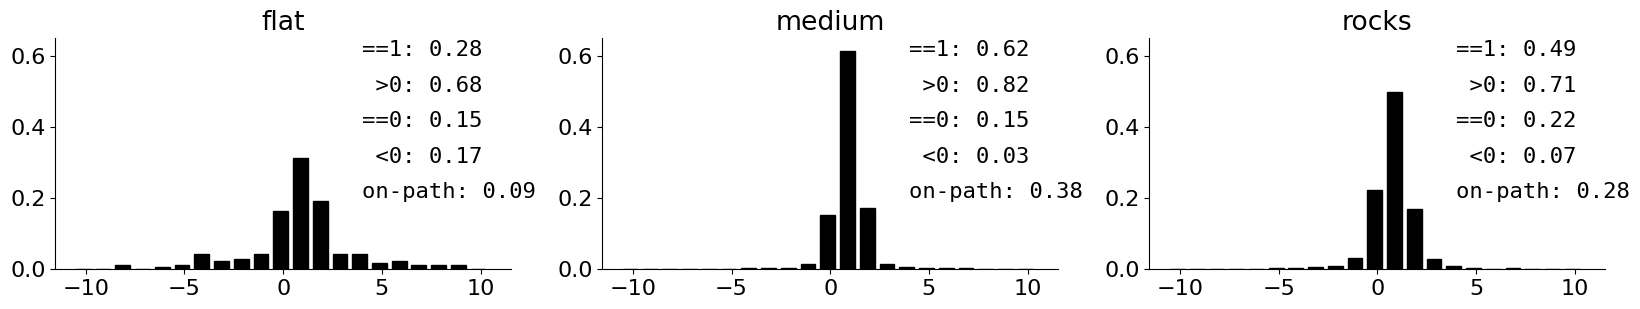

(3583,)

In [6]:
# foothold at each gaze sample

gaze_shift = []
subjs = [3,4,6,7,8,9,10]
walkTypes = ['flat','medium','rocks']
fig, axs = plt.subplots(1,3,figsize=(20,3))
plt.rcParams.update({'font.size': 16})

for ii,walkType in enumerate(walkTypes):  # 
    print(walkType)
    gaze_shift.append(np.ndarray(0))
    for participant_id in subjs:
        walkNum = butil.find_walks_with_type(participant_id,walkType)
        if participant_id == 6 and walkType=='pavement':
            walkNum=[2]
        footholds,gazeGround = butil.load_data(participant_id,walkNum)
    
        for ww in range(len(footholds)):

            # calculate the current foothold at every frame
            frame_edges = np.append(np.append(1,footholds[ww][:,0]),gazeGround[ww].shape[0]+1)
            frames_per_foothold = np.diff(frame_edges)
            current_foothold = np.array(reduce(concat,[int(ff)*[ee] for ee,ff in enumerate(frames_per_foothold)]))

            # find the foothold closest to each gaze point
            distances = cdist(gazeGround[ww],footholds[ww][:,2:])
            closest_foothold = np.argmin(distances,axis=1).astype(float)+1

            # remove ones that are too far from the foothold or otherwise seem like garbage or 
            # off the upcoming path (i.e., footsteps in the past)
            thresh = np.min(distances,axis=1)
            ind = np.logical_or(thresh>.4, closest_foothold-current_foothold<=0)
            closest_foothold[ind] = np.nan

            # calculate gaze shift (measured in delta footholds) per fixation
            fixation_start = frame_edges[:-2].astype(int)-1
            gshifts = np.diff(closest_foothold[fixation_start])
            gaze_shift[ii]=np.append(gaze_shift[ii],gshifts)
    
    axs[ii].text(4,.6,f'==1: {round(find_ones(gaze_shift[ii]),2)}',fontfamily='monospace')
    axs[ii].text(4,.5,f' >0: {round(find_greater_than_zero(gaze_shift[ii]),2)}',fontfamily='monospace')
    axs[ii].text(4,.4,f'==0: {round(find_zeros(gaze_shift[ii]),2)}',fontfamily='monospace')
    axs[ii].text(4,.3,f' <0: {round(find_less_than_zero(gaze_shift[ii]),2)}',fontfamily='monospace')
    axs[ii].text(4,.2,f'on-path: {round(1-np.isnan(gaze_shift[ii]).sum()/gaze_shift[ii].shape[0],2)}',fontfamily='monospace')
            
#     print('==1:', round(find_ones(gaze_shift[ii]),2),
#           ', >0:', round(find_greater_than_zero(gaze_shift[ii]),2),
#           ', ==0:',round(find_zeros(gaze_shift[ii]),2),
#           ', <0:', round(find_less_than_zero(gaze_shift[ii]),2),
#           ', on-path:', round(1-np.isnan(gaze_shift[ii]).sum()/gaze_shift[ii].shape[0],2))

    
    
    tmp = axs[ii].hist(np.expand_dims(gaze_shift[ii],1),bins=np.arange(-10.5,11.),
                       edgecolor='black', color='black',density=True, width=.75)
    axs[ii].spines['top'].set_visible(False)
    axs[ii].spines['right'].set_visible(False)

    axs[ii].set_title(walkTypes[ii])
    axs[ii].set_ylim([0,.65])

plt.savefig('gaze-sequences-aggregate.pdf')
plt.show()
gaze_shift[2].shape

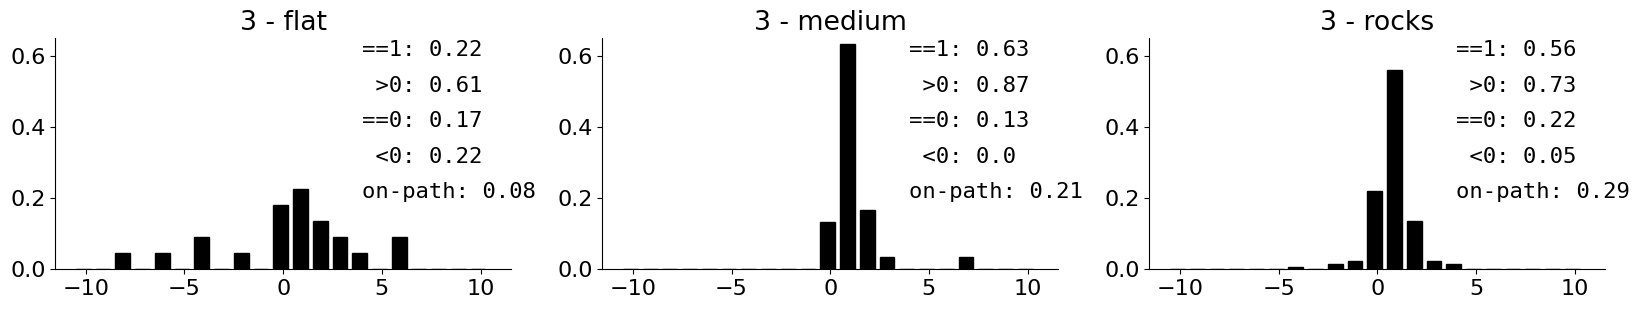

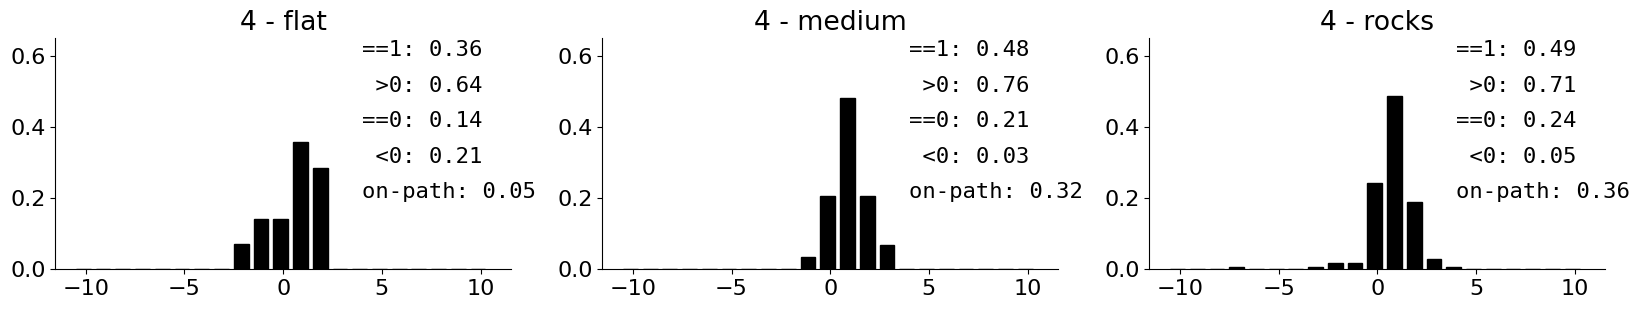

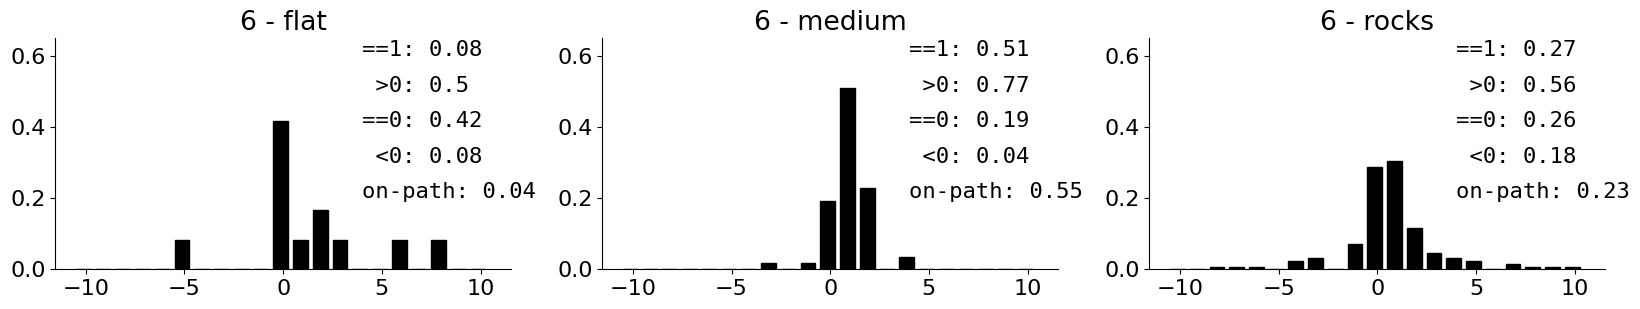

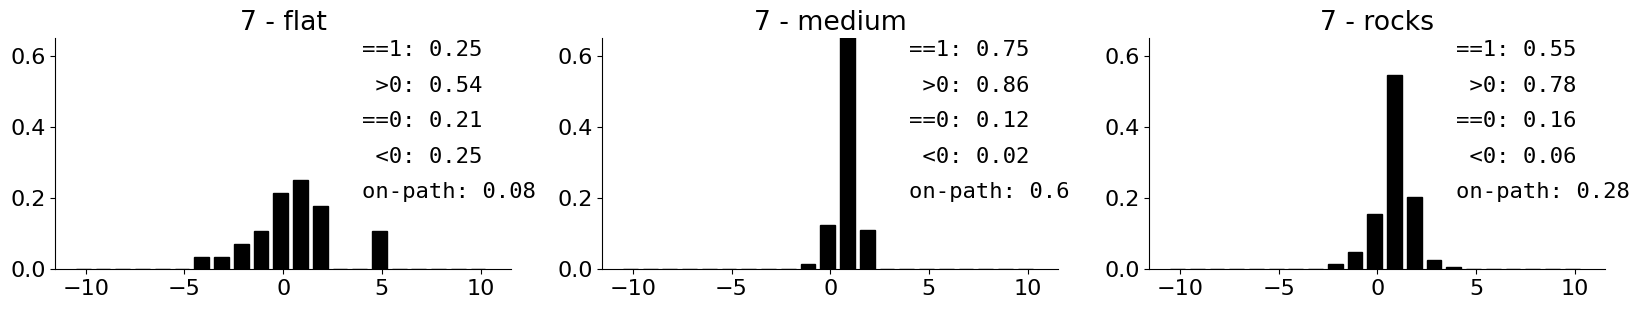

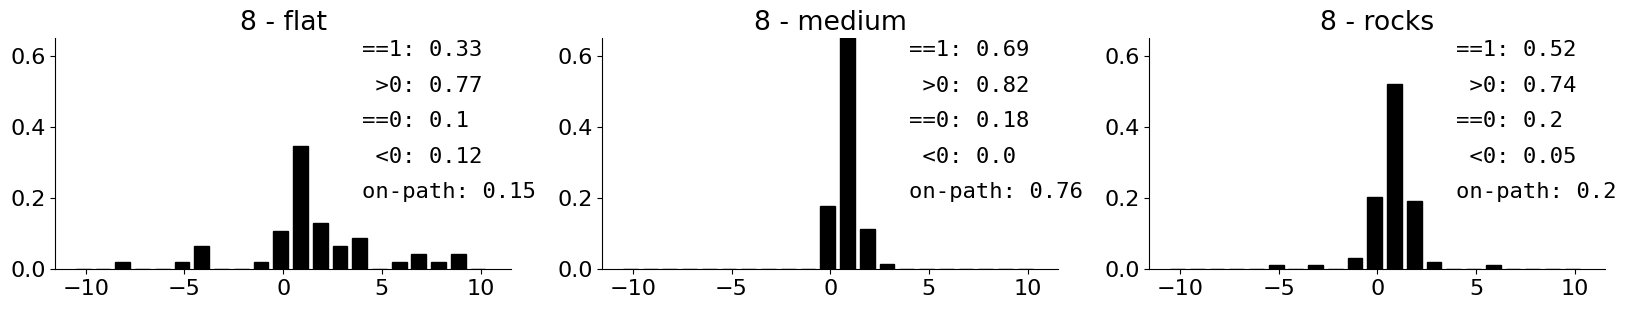

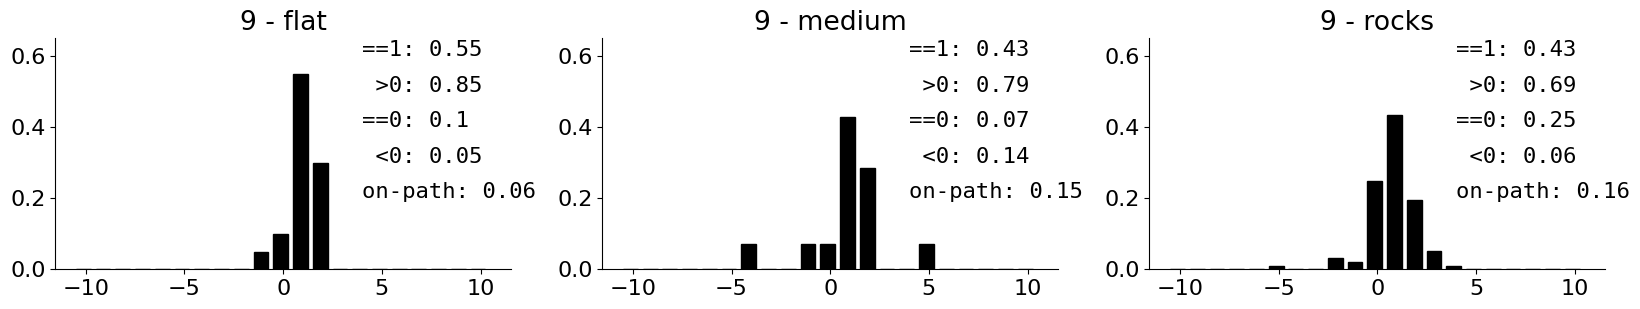

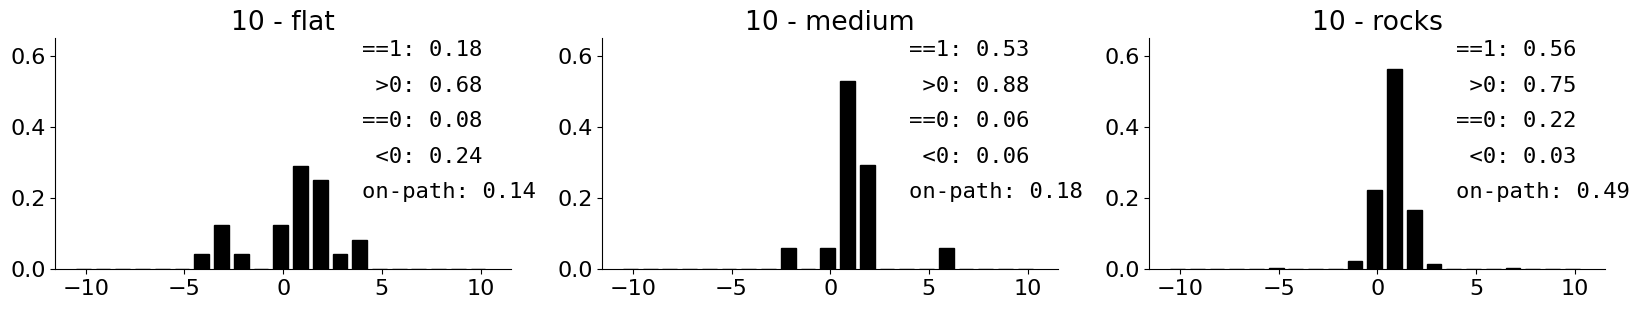

In [4]:
# foothold at each gaze sample


walkTypes = ['flat','medium','rocks']
subjs = [3,4,6,7,8,9,10]

plt.rcParams.update({'font.size': 16})

for participant_id in subjs:
    fig, axs = plt.subplots(1,3,figsize=(20,3))
    
    gaze_shift = []
    for ii,walkType in enumerate(walkTypes):  # 
        gaze_shift.append(np.ndarray(0))
        walkNum = butil.find_walks_with_type(participant_id,walkType)
        if participant_id == 6 and walkType=='pavement':
            walkNum=[2]
        footholds,gazeGround = butil.load_data(participant_id,walkNum)
    
        for ww in range(len(footholds)):

            # calculate the current foothold at every frame
            frame_edges = np.append(np.append(1,footholds[ww][:,0]),gazeGround[ww].shape[0]+1)
            frames_per_foothold = np.diff(frame_edges)
            current_foothold = np.array(reduce(concat,[int(ff)*[ee] for ee,ff in enumerate(frames_per_foothold)]))

            # find the foothold closest to each gaze point
            distances = cdist(gazeGround[ww],footholds[ww][:,2:])
            closest_foothold = np.argmin(distances,axis=1).astype(float)+1

            # remove ones that are too far from the foothold or otherwise seem like garbage or 
            # off the upcoming path (i.e., footsteps in the past)
            thresh = np.min(distances,axis=1)
            ind = np.logical_or(thresh>.4, closest_foothold-current_foothold<=0)
            closest_foothold[ind] = np.nan

            # calculate gaze shift (measured in delta footholds) per fixation
            fixation_start = frame_edges[:-2].astype(int)-1
            gshifts = np.diff(closest_foothold[fixation_start])
            gaze_shift[ii]=np.append(gaze_shift[ii],gshifts)
    
            
        axs[ii].text(4,.6,f'==1: {round(find_ones(gaze_shift[ii]),2)}',fontfamily='monospace')
        axs[ii].text(4,.5,f' >0: {round(find_greater_than_zero(gaze_shift[ii]),2)}',fontfamily='monospace')
        axs[ii].text(4,.4,f'==0: {round(find_zeros(gaze_shift[ii]),2)}',fontfamily='monospace')
        axs[ii].text(4,.3,f' <0: {round(find_less_than_zero(gaze_shift[ii]),2)}',fontfamily='monospace')
        axs[ii].text(4,.2,f'on-path: {round(1-np.isnan(gaze_shift[ii]).sum()/gaze_shift[ii].shape[0],2)}',fontfamily='monospace')
  
    
        
        tmp = axs[ii].hist(np.expand_dims(gaze_shift[ii],1),bins=np.arange(-10.5,11.),
                           edgecolor='black', color='black',density=True, width=.75)
        axs[ii].spines['top'].set_visible(False)
        axs[ii].spines['right'].set_visible(False)

        axs[ii].set_title(str(participant_id) + ' - ' + walkTypes[ii])
        axs[ii].set_ylim([0,.65])

    plt.show()

In [6]:
cdist(footholds[ww][0:15,2:],footholds[ww][0:15,2:])
# footholds[ww][10:15,2:]

array([[ 0.        ,  0.83432751,  1.95584586,  3.10003468,  4.29971354,
         5.39885567,  6.51246754,  7.64543587,  9.07092713,  9.6281516 ,
        10.92181892, 11.53083155, 12.90195152, 13.68556015, 14.84110497],
       [ 0.83432751,  0.        ,  1.15106095,  2.34266386,  3.64536702,
         4.66053639,  5.80543131,  6.93314555,  8.3709533 ,  8.91563991,
        10.19362532, 10.79213925, 12.15558667, 12.91848185, 14.05481389],
       [ 1.95584586,  1.15106095,  0.        ,  1.2185342 ,  2.61815582,
         3.53350718,  4.69981346,  5.81901706,  7.26474022,  7.79915195,
         9.06789575,  9.65985023, 11.01861959, 11.77419253, 12.9092513 ],
       [ 3.10003468,  2.34266386,  1.2185342 ,  0.        ,  1.47300743,
         2.3190706 ,  3.48163835,  4.60093497,  6.04686292,  6.58244326,
         7.85808019,  8.45475357,  9.81817493, 10.5917255 , 11.75366002],
       [ 4.29971354,  3.64536702,  2.61815582,  1.47300743,  0.        ,
         1.34196129,  2.25528838,  3.38363196, 

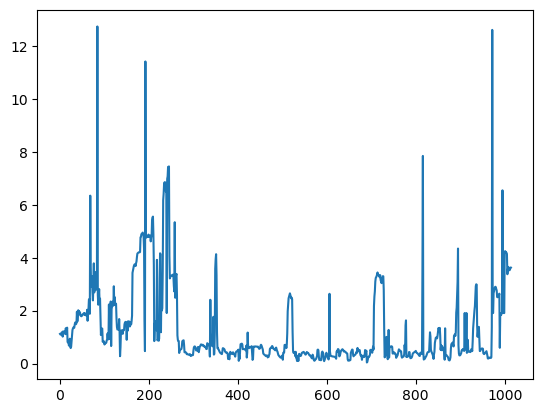

In [129]:
plt.plot(thresh)